Suppose you are working as an analyst in a microprocessor chip manufacturing plant.

You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam.

Data was collected and provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the etching rate by the machine.

You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power.

- State the null hypothesis
- State the alternate hypothesis
- What is the significance level
- What are the degrees of freedom of model, error terms, and total DoF

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin

In [90]:
df = pd.read_excel('anova_lab_data.xlsx')
df

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Power         15 non-null     object 
 1   Etching Rate  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 372.0+ bytes


State the **null hypothesis**: the level of power **doesn't** have an effect on the etching rate

State the **alternate hypothesis**: the level of power **does** have an effect on the etching rate

**Level of significance**: alpha = 0.05

Model Degrees of freedom: 1 (power)

Error Degrees of Freedom: n - p = 15 - 2 = 13

Total Degrees of Freedom: n - 1 = 14

In [92]:
df.columns

Index(['Power ', 'Etching Rate'], dtype='object')

In [ ]:
df.rename(columns={'Power ':'power'}, inplace=True) # rename columns
df.rename(columns={'Etching Rate':'etching_rate'}, inplace=True)
df['power'] = [x.split(' ')[0] for x in df['power']] # list comprehension to get the number out of the power (delete the 'W')

In [94]:
df.sort_values('power') # check quickly if there is a correlation

,power,etching_rate
0,160,5.43
3,160,5.71
6,160,6.22
9,160,6.01
12,160,5.59
1,180,6.24
4,180,6.71
7,180,5.98
10,180,5.66
13,180,6.60


In [95]:
df['power'] = df['power'].astype(int) # it was an object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   power         15 non-null     int32  
 1   etching_rate  15 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 312.0 bytes


<Axes: xlabel='power', ylabel='etching_rate'>

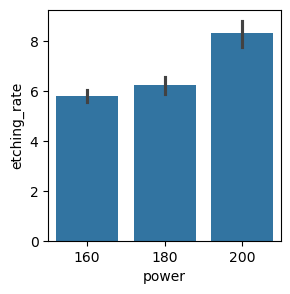

In [108]:
plt.figure(figsize=(3,3)) 
sns.barplot(data=df, x= 'power', y='etching_rate') # check quickly if there is a correlation

<Axes: >

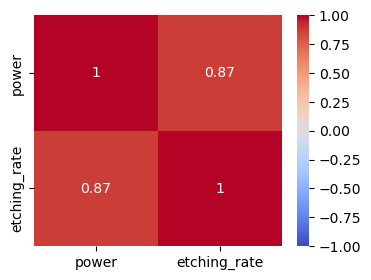

In [111]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1) # check quickly if there is a correlation

It looks like indeed there is a correlation between ``power`` and ``etching_rate``

In [105]:
# perform mannwhitneyu test
results_1 = pingouin.mwu(x=df['power']
             , y=df['etching_rate']
             , alternative='greater')
results_1

,U-val,alternative,p-val,RBC,CLES
MWU,225.0,greater,0.000001,1.0,1.0


Since the p-value is way lower than the level of significance (alpha = 0.05), we can strongly **reject the null hypothesis**, meaning the power has a strong effect on the etching rate